In [82]:
%run func_def.ipynb

imports loaded.

Pre-Processing func:
********************
    get_height(item)
    get_weight(item)
    get_reach(item)
    get_std_reach(item, height, reach_list, height_list)
    get_age(item)
    get_std_age(item, age_list)
    get_win_perc(name, date, df)
    get_lose_streak_data_frame(name, date, df)
    get_win_streak_data_frame(name, date, df)
    get_streak_data_frame(name, date, df)
    get_win_streak(name, date, df)
    get_lose_streak(name, date, df)
    get_fighter_stats(name, data )
    add_columns(data, column_list)

Feature Engineering func:
*************************
    get_stat(index, data, stat='height', fo='')
    get_swaped_row(index, data)
    get_wins(combo, data)
    get_wins_ratio(combo, data)

fight_stats_model_training func:
********************************
    get_sig_features(data, sig_r)
    get_r_score(X, y)
    set_train_test(X_columns, y_columns, data, test_size=0.3, valid_size=0.3)
    set_knn_reg(X_columns, y_columns, data, n=5)
    set_predictions(mo

In [83]:
red_fighter = 'Alexander Volkanovski'
blue_fighter = 'Islam Makhachev'
print(red_fighter + ' vs ' + blue_fighter)

Alexander Volkanovski vs Islam Makhachev


In [84]:
loc = '../data/'
file = 'ufc_fighters_stats_processed.csv'
stats = pd.read_csv(loc+file)
stats = stats[stats.columns[1:]]
print('Data Frame loaded: '+str(stats.shape))
stats.tail(3)

Data Frame loaded: (11198, 17)


,name,wins,losses,draws,height,weight,reach,stance,age,slpm,str. acc.,sapm,str. def,td avg.,td acc.,td def.,sub. avg.
11195,Carlos Zevallos,3,0.0,-0,182.88,92.25,187.37,Orthodox,37.31,4.36,0.65,2.28,0.68,0.0,0.0,1.00,0.0
11196,Zach Zane,10,7.0,0,170.18,65.25,175.26,Southpaw,33.00,0.87,0.56,6.67,0.20,0.0,0.0,0.26,0.0
11197,Roger Zapata,4,0.0,-0,180.34,76.50,184.77,Southpaw,36.00,2.60,0.51,2.13,0.36,0.0,0.0,0.81,1.4


In [85]:
loc = '../data/'
file = 'ufc_data_features.csv'
df = pd.read_csv(loc+file)
df = df[df.columns[1:]]
df.date =  pd.to_datetime(df.date)
df.tail(3)

,result,fighter,opponent,date,weight class,method,kd_dif,str_dif,td_dif,sub_dif,td avg._dif,td acc._dif,td def._dif,sub. avg._dif,slpm_dif,str. acc._dif,sapm_dif,str. def_dif,stance_win_ratio,win_perc_dif,win_strk_dif,lose_strk_dif
6728,win,Aleksandra Albu,Kailin Curran,2017-07-29,Women's Strawweight,U-DEC:,0.007043,-0.13660,1.572182,0.000126,0.146611,-0.234918,0.536244,-0.191655,0.609627,0.331825,0.489153,-1.247508,-0.017271,2.039564,0.562079,-2.148820
6729,lose,Eric Shelton,Jarred Brooks,2017-07-29,Flyweight,S-DEC:,0.007043,0.16454,-1.585788,0.000126,-0.957237,-0.199947,-0.770475,-0.382332,0.299636,-0.316816,0.128955,0.098283,0.076432,-0.004555,-0.009943,1.083053
6730,win,Drew Dober,Joshua Burkman,2017-07-29,Lightweight,KO/TKO:Punch,1.361536,0.16454,-0.006803,0.000126,-0.996262,-0.654576,-0.602947,-0.191655,1.141041,-0.235736,0.623465,0.014171,1.488122,0.123202,-0.009943,-2.148820


In [86]:
X = df.columns[df.columns.get_loc('kd_dif'):df.columns.get_loc('lose_strk_dif')+1]
#X = df.columns[df.columns.get_loc('td avg._dif'):df.columns.get_loc('lose_strk_dif')+1]
y = ['result']
print('X = %s'  %X)
print('y = %s' %y)

X = Index(['kd_dif', 'str_dif', 'td_dif', 'sub_dif', 'td avg._dif', 'td acc._dif',
       'td def._dif', 'sub. avg._dif', 'slpm_dif', 'str. acc._dif', 'sapm_dif',
       'str. def_dif', 'stance_win_ratio', 'win_perc_dif', 'win_strk_dif',
       'lose_strk_dif'],
      dtype='object')
y = ['result']


### blue_fighter model:

In [87]:
blue_data = df[(df.fighter==blue_fighter)|(df.opponent==blue_fighter)].reset_index(drop=True).copy()
blue_data['set'] = 'train' #default value
blue_data.head(3)

,result,fighter,opponent,date,weight class,method,kd_dif,str_dif,td_dif,sub_dif,td avg._dif,td acc._dif,td def._dif,sub. avg._dif,slpm_dif,str. acc._dif,sapm_dif,str. def_dif,stance_win_ratio,win_perc_dif,win_strk_dif,lose_strk_dif,set
0,lose,Gleison Tibau,Islam Makhachev,2018-01-20,Lightweight,KO/TKO:Punch,-1.347450,-0.023673,-0.006803,0.000126,0.364036,-0.409776,0.134177,-0.477671,-0.250756,-2.262738,0.947033,-0.238165,-0.829313,-0.336725,-1.153986,2.160344,train
1,win,Adriano Martins,Islam Makhachev,2015-10-03,Lightweight,KO/TKO:Punch,1.361536,-0.023673,-0.006803,0.000126,-1.447836,0.534454,-0.234385,-0.859025,-0.345651,-1.695177,0.721146,-0.069941,-0.829313,-0.643343,0.562079,0.005762,train
2,win,Islam Makhachev,Kajan Johnson,2018-07-28,Lightweight,SUB:Armbar,0.007043,0.013970,0.387943,0.847459,1.044185,0.989083,0.871300,1.047748,-0.048313,1.385866,-0.396081,0.182395,1.488122,-0.004555,-0.581965,0.005762,train


#### duplicate "losses" of blue_fighter to balanced data:

In [88]:
get_losses(fighter=fighter, data=blue_data)

,result,fighter,opponent,date,weight class,method,kd_dif,str_dif,td_dif,sub_dif,td avg._dif,td acc._dif,td def._dif,sub. avg._dif,slpm_dif,str. acc._dif,sapm_dif,str. def_dif,stance_win_ratio,win_perc_dif,win_strk_dif,lose_strk_dif,set
0,win,Adriano Martins,Islam Makhachev,2015-10-03,Lightweight,KO/TKO:Punch,1.361536,-0.023673,-0.006803,0.000126,-1.447836,0.534454,-0.234385,-0.859025,-0.345651,-1.695177,0.721146,-0.069941,-0.829313,-0.643343,0.562079,0.005762,train


In [89]:
num_of_wins = len(get_wins(fighter=fighter, data=blue_data))
num_of_losses = len(get_losses(fighter=fighter, data=blue_data))

for i in tqdm(range(num_of_wins-num_of_losses)):
    blue_data = pd.concat([blue_data,get_losses(fighter=fighter, data=blue_data)],ignore_index=True)

blue_data = blue_data.reset_index(drop=True)
blue_data

100%|██████████| 11/11 [00:00<00:00, 448.82it/s]


,result,fighter,opponent,date,weight class,method,kd_dif,str_dif,td_dif,sub_dif,td avg._dif,td acc._dif,td def._dif,sub. avg._dif,slpm_dif,str. acc._dif,sapm_dif,str. def_dif,stance_win_ratio,win_perc_dif,win_strk_dif,lose_strk_dif,set
0,lose,Gleison Tibau,Islam Makhachev,2018-01-20,Lightweight,KO/TKO:Punch,-1.347450,-0.023673,-0.006803,0.000126,0.364036,-0.409776,0.134177,-0.477671,-0.250756,-2.262738,0.947033,-0.238165,-0.829313,-0.336725,-1.153986,2.160344,train
1,win,Adriano Martins,Islam Makhachev,2015-10-03,Lightweight,KO/TKO:Punch,1.361536,-0.023673,-0.006803,0.000126,-1.447836,0.534454,-0.234385,-0.859025,-0.345651,-1.695177,0.721146,-0.069941,-0.829313,-0.643343,0.562079,0.005762,train
2,win,Islam Makhachev,Kajan Johnson,2018-07-28,Lightweight,SUB:Armbar,0.007043,0.013970,0.387943,0.847459,1.044185,0.989083,0.871300,1.047748,-0.048313,1.385866,-0.396081,0.182395,1.488122,-0.004555,-0.581965,0.005762,train
3,win,Islam Makhachev,Dan Hooker,2021-10-30,Lightweight,SUB:Kimura,0.007043,-0.061315,0.387943,1.694792,1.406559,1.024055,0.335210,1.047748,-1.591942,0.980465,-2.361912,1.275849,1.554775,0.634232,3.994208,0.005762,train
4,lose,Thiago Moises,Islam Makhachev,2021-07-17,Lightweight,SUB:Rear Naked Choke,0.007043,-1.792874,-0.796295,0.000126,-1.291736,-1.004291,-0.938003,-0.096316,0.084541,-1.776257,1.868898,-0.826949,-1.776060,-0.566688,-2.298030,0.005762,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2055,win,Adriano Martins,Islam Makhachev,2015-10-03,Lightweight,KO/TKO:Punch,1.361536,-0.023673,-0.006803,0.000126,-1.447836,0.534454,-0.234385,-0.859025,-0.345651,-1.695177,0.721146,-0.069941,-0.829313,-0.643343,0.562079,0.005762,train
2056,win,Adriano Martins,Islam Makhachev,2015-10-03,Lightweight,KO/TKO:Punch,1.361536,-0.023673,-0.006803,0.000126,-1.447836,0.534454,-0.234385,-0.859025,-0.345651,-1.695177,0.721146,-0.069941,-0.829313,-0.643343,0.562079,0.005762,train
2057,win,Adriano Martins,Islam Makhachev,2015-10-03,Lightweight,KO/TKO:Punch,1.361536,-0.023673,-0.006803,0.000126,-1.447836,0.534454,-0.234385,-0.859025,-0.345651,-1.695177,0.721146,-0.069941,-0.829313,-0.643343,0.562079,0.005762,train
2058,win,Adriano Martins,Islam Makhachev,2015-10-03,Lightweight,KO/TKO:Punch,1.361536,-0.023673,-0.006803,0.000126,-1.447836,0.534454,-0.234385,-0.859025,-0.345651,-1.695177,0.721146,-0.069941,-0.829313,-0.643343,0.562079,0.005762,train


#### set new fight:

In [37]:
#blue_data = pd.concat([blue_data,set_new_fight(fighter=red_fighter, opponent=blue_fighter, data=blue_data)], ignore_index=True)
#blue_data.tail(3)

### Kfold cross validation

In [95]:
k = 4
batch_size = int(len(blue_data)/k)
acc = []
for i in range(0,len(blue_data)-batch_size+1, batch_size):
    print('test_set = [%d:%d]' %(i,i+batch_size))
    blue_data.loc[:,'set'] = 'train'
    blue_data.loc[i:i+batch_size,'set'] = 'test'
    knn_clf = set_knn_clf(X_columns=X, y_columns=y, data=blue_data, neighbors=2)
    blue_data = set_predictions(model=knn_clf, data=blue_data, X_columns=X, y_columns=y)
    y_pred = blue_data['result_pred'][blue_data.set=='test']
    y_act = blue_data.loc[blue_data.set=='test','result']
    acc.append(get_accuracy(act=y_act, pred=y_pred))

print('Model Accuracy: %.3f ( = mean(%s))' %(np.mean(acc),acc ))    

test_set = [0:515]
test_set = [515:1030]
test_set = [1030:1545]
test_set = [1545:2060]
Model Accuracy: 0.997 ( = mean([0.9864341085271318, 1.0, 1.0, 1.0]))


model suffers from biasing = not enough losing fights data

In [93]:
knn_clf = set_knn_clf(X_columns=X, y_columns=y, data=blue_data, neighbors=5)
blue_data = set_predictions(model=knn_clf, data=blue_data, X_columns=X, y_columns=y)
blue_data.tail(3)

,result,fighter,opponent,date,weight class,method,kd_dif,str_dif,td_dif,sub_dif,td avg._dif,td acc._dif,td def._dif,sub. avg._dif,slpm_dif,str. acc._dif,sapm_dif,str. def_dif,stance_win_ratio,win_perc_dif,win_strk_dif,lose_strk_dif,set,result_pred
2057,win,Adriano Martins,Islam Makhachev,2015-10-03,Lightweight,KO/TKO:Punch,1.361536,-0.023673,-0.006803,0.000126,-1.447836,0.534454,-0.234385,-0.859025,-0.345651,-1.695177,0.721146,-0.069941,-0.829313,-0.643343,0.562079,0.005762,test,win
2058,win,Adriano Martins,Islam Makhachev,2015-10-03,Lightweight,KO/TKO:Punch,1.361536,-0.023673,-0.006803,0.000126,-1.447836,0.534454,-0.234385,-0.859025,-0.345651,-1.695177,0.721146,-0.069941,-0.829313,-0.643343,0.562079,0.005762,test,win
2059,win,Adriano Martins,Islam Makhachev,2015-10-03,Lightweight,KO/TKO:Punch,1.361536,-0.023673,-0.006803,0.000126,-1.447836,0.534454,-0.234385,-0.859025,-0.345651,-1.695177,0.721146,-0.069941,-0.829313,-0.643343,0.562079,0.005762,test,win


Accuracy = 1.000000


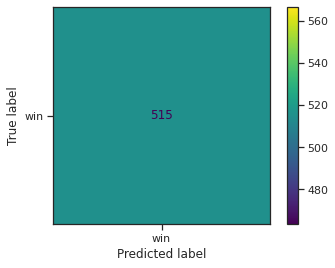

In [94]:
get_model_evaluation(data=blue_data)

### red_fighter model:

In [59]:
red_data = get_fighter_data(fighter=red_fighter, data=df)
red_data.head(3)

,result,fighter,opponent,date,weight class,method,kd_dif,str_dif,td_dif,sub_dif,td avg._dif,td acc._dif,td def._dif,sub. avg._dif,slpm_dif,str. acc._dif,sapm_dif,str. def_dif,stance_win_ratio,win_perc_dif,win_strk_dif,lose_strk_dif
0,lose,Max Holloway,Alexander Volkanovski,2022-07-02,Featherweight,U-DEC:,0.007043,-2.696297,-0.006803,0.000126,-0.795562,0.604397,0.368716,0.094361,0.299636,-0.803296,0.824932,-0.069941,-0.017271,-0.617791,-5.158138,0.005762
1,win,Alexander Volkanovski,Chan Sung Jung,2022-04-09,Featherweight,KO/TKO:Punches,1.361536,3.401803,1.572182,0.000126,0.536861,-0.374804,0.033660,-0.477671,1.798981,1.223706,-0.505972,0.687066,-0.017271,0.761989,5.138252,0.005762
2,win,Alexander Volkanovski,Brian Ortega,2021-09-25,Featherweight,U-DEC:,0.007043,4.756936,-0.796295,-2.541873,0.419786,0.464511,0.569750,-0.954364,1.659801,1.548026,-1.916242,0.939402,0.076432,0.302063,4.566230,0.005762


In [60]:
red_data = set_train_test(X_columns=X, y_columns=y, data=red_data, test_size=0.4, valid_size=0)

Data split: Data=(12, 23), train_set=(5, 16), validation_set=(0, 16), test_set=(7, 16)


In [61]:
knn_clf = set_knn_clf(X_columns=X, y_columns=y, data=red_data, neighbors=2)
red_data = set_predictions(model=knn_clf, data=red_data, X_columns=X, y_columns=y)
red_data.tail(3)

,set,result,fighter,opponent,date,weight class,method,kd_dif,str_dif,td_dif,sub_dif,td avg._dif,td acc._dif,td def._dif,sub. avg._dif,slpm_dif,str. acc._dif,sapm_dif,str. def_dif,stance_win_ratio,win_perc_dif,win_strk_dif,lose_strk_dif,result_pred
9,test,lose,Shane Young,Alexander Volkanovski,2017-11-18,Catch Weight,U-DEC:,0.007043,-1.868160,-1.585788,0.000126,-0.511238,-0.444747,-0.569441,-0.191655,-0.978286,-1.370857,0.898193,-0.406389,-0.017271,-2.559705,-1.153986,0.005762,lose
10,test,lose,Mizuto Hirota,Alexander Volkanovski,2017-06-10,Featherweight,U-DEC:,-1.347450,-1.529376,-1.585788,0.000126,-0.199038,0.499483,-0.502430,-0.096316,-2.154987,-1.370857,-0.023672,-0.490501,-0.017271,-1.716505,-0.009943,0.005762,lose
11,train,lose,Yusuke Kasuya,Alexander Volkanovski,2016-11-26,Lightweight,KO/TKO:Punches,0.007043,-1.717589,-0.796295,0.000126,-0.199038,-0.095032,-2.445755,-0.191655,-2.907822,-1.046536,0.489153,-0.995172,1.488122,-0.004555,-0.009943,1.083053,lose


Accuracy = 1.000000


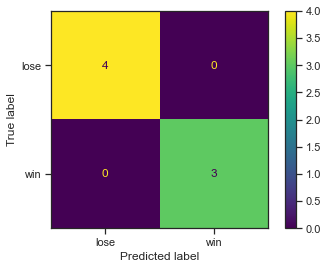

In [62]:
get_model_evaluation(data=red_data)